# Clean, Analyze, Visualize And Perform EDA With Klib Library

### The klib package provides a number of very easily applicable functions with sensible default values that can be used on virtually any DataFrame to assess data quality, gain insight, perform cleaning operations and visualizations which results in a much lighter and more convenient to work with Pandas DataFrame.

# klib.clean - functions for cleaning datasets

- klib.data_cleaning() 
 -performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)
- klib.clean_column_names() 
 -cleans and standardizes column names, also called inside data_cleaning()
- klib.convert_datatypes() 
 -converts existing to more efficient dtypes, also called inside data_cleaning()

In [26]:
# Import 
import pandas as pd
import numpy as np
import klib

### Loading Dataset

In [27]:
data = pd.read_csv(r"D:\DATA SCIENCE\ml-prep\week-1\vgsales.csv")
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [17]:
data.shape 

(16598, 11)

## klib.data_cleaning() performs a number of steps, among them:

### - Cleaning the column names:
This unifies the column names by formatting them, splitting, among others, CamelCase into camel_case, removing special characters as well as leading and trailing white-spaces and formatting all column names to lowercase_and_underscore_separated. This also checks for and fixes duplicate column names, which you sometimes get when reading data from a file.

Some column name examples:

Yards.Gained --> yards_gained

PlayAttempted --> play_attempted

Challenge.Replay --> challenge_replay


### - Dropping empty and virtually empty columns:
You can use the parameters drop_threshold_cols and drop_threshold_rows to adjust the dropping to your needs. The default is to drop columns and rows with more than 90% of the values missing.

### - Removes single valued columns:
As the name states, this removes columns in which each cell contains the same value. This comes in handy when columns such as “year” are included while you’re just looking at a single year. Other examples are “download_date” or indicator variables which are identical for all entries.

### - Drops duplicate rows:
This is a straightforward drop of entirely duplicate rows. If you are dealing with data where duplicates add value,

consider setting drop_duplicates=False.

### - Optimizes the datatypes and Memory reduction

In [18]:
df_cleaned = klib.data_cleaning(data)

Shape of cleaned data: (16598, 11) - Remaining NAs: 329


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.69 MB (-49.64%)



In [19]:
df_cleaned

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.490002,29.02,3.77,8.46,82.739998
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.080000,3.58,6.81,0.77,40.240002
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.850000,12.88,3.79,3.31,35.820000
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.750000,11.01,3.28,2.96,33.000000
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.270000,8.89,10.22,1.00,31.370001
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.010000,0.00,0.00,0.00,0.010000
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.010000,0.00,0.00,0.00,0.010000
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.000000,0.00,0.00,0.00,0.010000
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.000000,0.01,0.00,0.00,0.010000


In [20]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   rank          16598 non-null  int16   
 1   name          16598 non-null  string  
 2   platform      16598 non-null  category
 3   year          16327 non-null  float32 
 4   genre         16598 non-null  category
 5   publisher     16540 non-null  string  
 6   na_sales      16598 non-null  float32 
 7   eu_sales      16598 non-null  float32 
 8   jp_sales      16598 non-null  float32 
 9   other_sales   16598 non-null  float32 
 10  global_sales  16598 non-null  float32 
dtypes: category(2), float32(6), int16(1), string(2)
memory usage: 715.0 KB


GridSpec(6, 6)

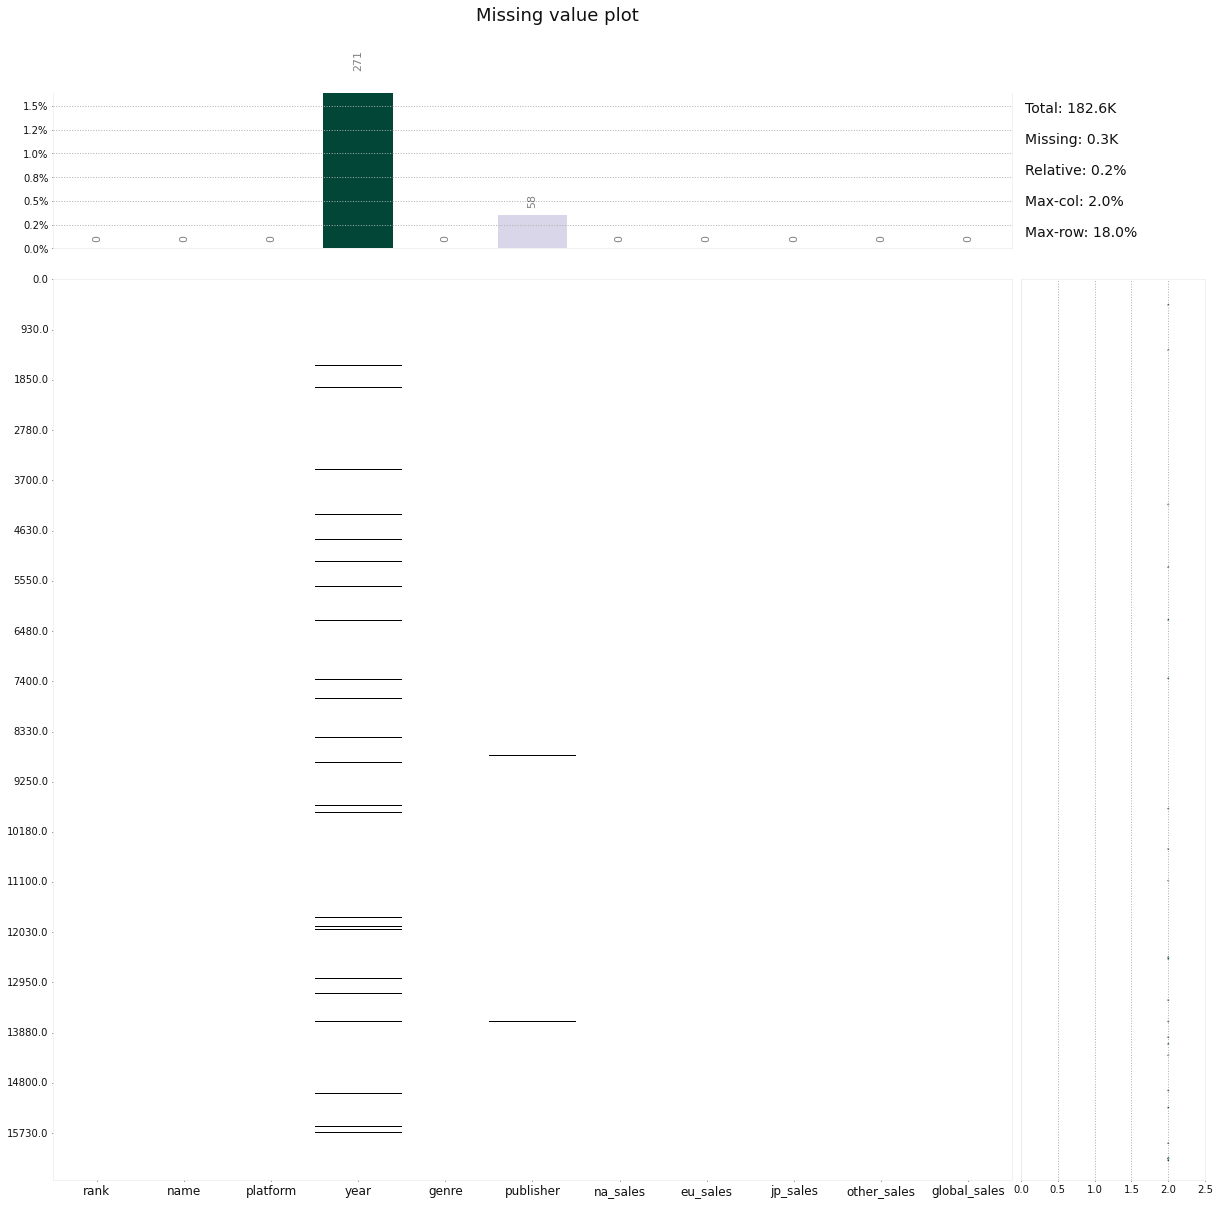

In [21]:
klib.missingval_plot(df_cleaned)

In [22]:
klib.clean_column_names(df_cleaned)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.490002,29.02,3.77,8.46,82.739998
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.080000,3.58,6.81,0.77,40.240002
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.850000,12.88,3.79,3.31,35.820000
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.750000,11.01,3.28,2.96,33.000000
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.270000,8.89,10.22,1.00,31.370001
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.010000,0.00,0.00,0.00,0.010000
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.010000,0.00,0.00,0.00,0.010000
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.000000,0.00,0.00,0.00,0.010000
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.000000,0.01,0.00,0.00,0.010000


In [23]:
klib.pool_duplicate_subsets(df_cleaned)

,rank,name,genre,publisher,pooled_vars
0,1,Wii Sports,Sports,Nintendo,0
1,2,Super Mario Bros.,Platform,Nintendo,1
2,3,Mario Kart Wii,Racing,Nintendo,2
3,4,Wii Sports Resort,Sports,Nintendo,3
4,5,Pokemon Red/Pokemon Blue,Role-Playing,Nintendo,4
...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,Platform,Kemco,16085
16594,16597,Men in Black II: Alien Escape,Shooter,Infogrames,16249
16595,16598,SCORE International Baja 1000: The Official Game,Racing,Activision,16595
16596,16599,Know How 2,Puzzle,7G//AMES,16328


- klib.drop_missing() 
drops missing values, also called in ".data_cleaning()"
 
- klib.mv_col_handling()
 drops features with a high ratio of missing values based on their informational content
 
- klib.pool_duplicate_subsets() 
pools a subset of columns based on duplicate values with minimal loss of information

# klib.describe - functions for visualizing datasets
- klib.cat_plot(df) 
visualization of the number and frequency of categorical features


GridSpec(6, 4)

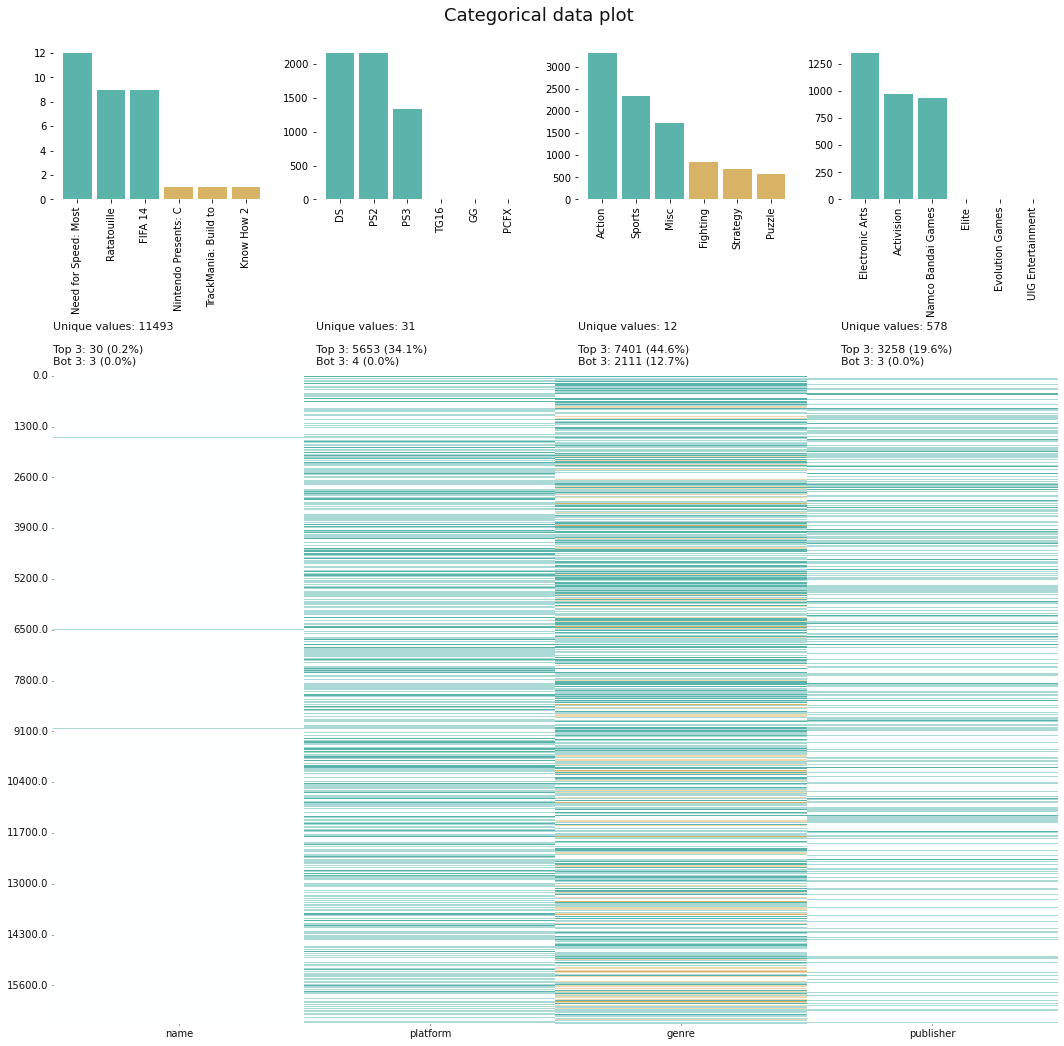

In [18]:
klib.cat_plot(df_cleaned)

# Display all correlations data

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

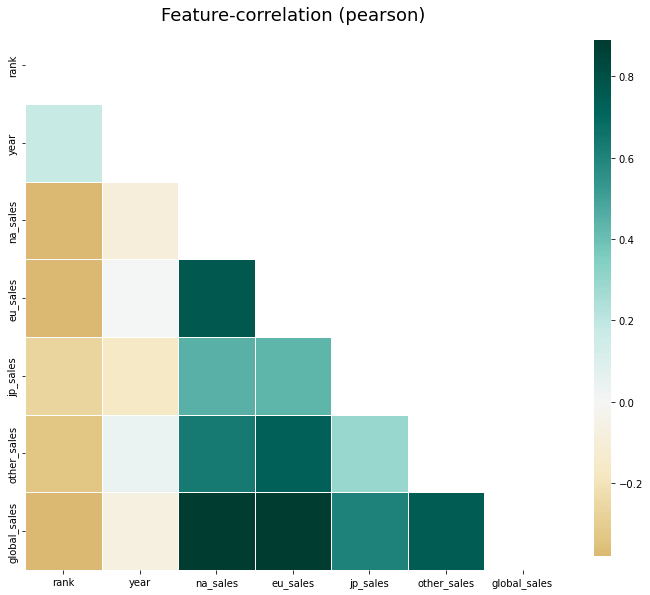

In [24]:
klib.corr_plot(df_cleaned, annot=False)

# Display only positive correlation

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

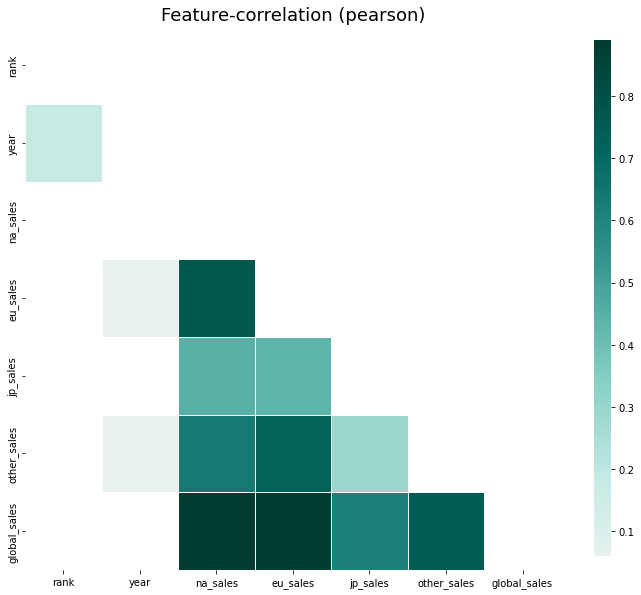

In [25]:
klib.corr_plot(df_cleaned, split='pos', annot=False)

# Display only negative correlation.

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

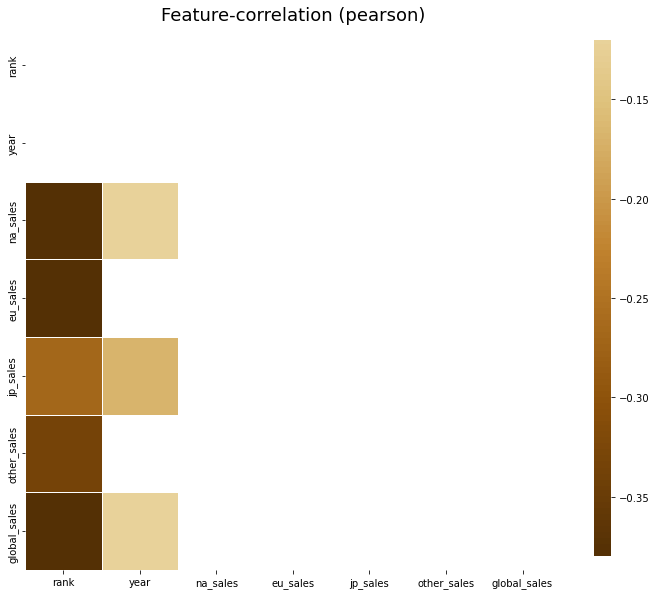

In [26]:
klib.corr_plot(df_cleaned, split='neg', annot=False)

# Display correlation with a target variable of interest

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

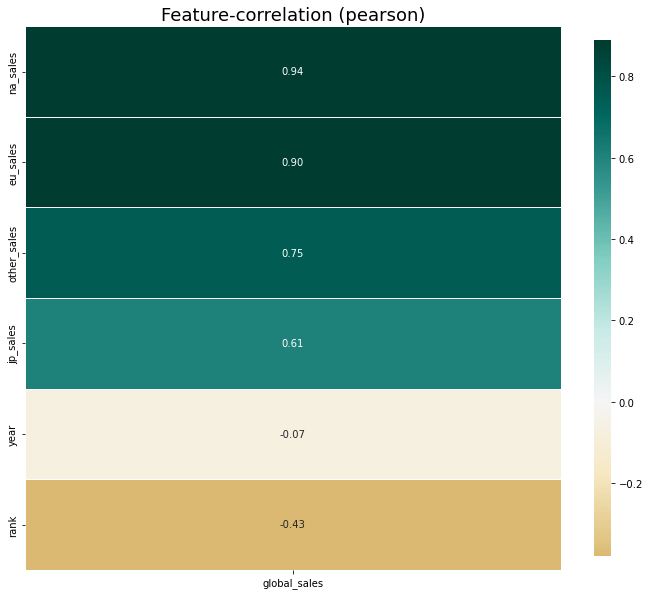

In [28]:
klib.corr_plot(df_cleaned, target='global_sales')

# Correlation data matrix

In [29]:
klib.corr_mat(df_cleaned)

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
rank,1.00,0.18,-0.40,-0.38,-0.27,-0.33,-0.43
year,0.18,1.00,-0.09,0.01,-0.17,0.04,-0.07
na_sales,-0.40,-0.09,1.00,0.77,0.45,0.63,0.94
eu_sales,-0.38,0.01,0.77,1.00,0.44,0.73,0.90
jp_sales,-0.27,-0.17,0.45,0.44,1.00,0.29,0.61
other_sales,-0.33,0.04,0.63,0.73,0.29,1.00,0.75
global_sales,-0.43,-0.07,0.94,0.90,0.61,0.75,1.00
